# HW2: Unsupervised Learning - Clustering

### In this homework you will work with Unsupervised learning and cluster a real-world dataset. You will apply 4 different algorithms, plot and evaluate the clustering results. Finally you will implement K-medians from scratch!



## **Student information**
Please provide your information for grading.

In [1]:
STUD_SUID = 'maha5381'
STUD_NAME = 'Majid Hassanabadi'
STUD_EMAIL = 'maha5381@dsv.su.se'

##  Grading: 

Total points: 5

## OUTLINE
## Total points: 5

1. Euclidean - Manhattan , **points: 0.5**
2. Purity , **points: 0.6**
3. Read and preprocess the wine dataset, **points: 0.2**
4. Elbow method, **points: 0.7**
5. Run K-means, K-medoids and Agglomerative clustering on the wine dataset, **points: 0.4**
6. Evaluation metrics, **points: 0.3**
7. Plotting, **points: 0.3**
6. Implementation of K-medians, **points: 2**


## `NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code. Some of the cells have already some variables that are filled with None values or empty dataframes, you should change those nan/empty values (we refer to it as 'change this') to what is asked in the tasks (we only stored the empty values so the whole notebook can run error free). You should not delete any of the given cells as they will help us grade the assignment. Some cells ask you to uncomment some comments, please only do so if you have solved the respective task. When you are finished with implementing all the tasks, clear all outputs,  **restart the kernel**, run all cells again (make sure there is no error) and submit! Make sure that the results and figures asked are visible for us to grade. ` 

## The dataset that you will use in this assignment is the Wine Dataset which you will download using sklearns dataset module (instructions are provided below in Task3):

Information can be found in the [link](https://archive.ics.uci.edu/ml/datasets/wine)

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

Attribute Information:

    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline

All attributes are numerical. The are no missing values. 

The target/class is the 3 different types of wines. 


In [2]:
#import here all the libraries needed for this assignment
import numpy as np 
import pandas as pd
import math


from sklearn import datasets

from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 
RSEED = 2

## 1. Euclidean-Manhattan

### `Task:`

###  `In the function named calculate_distances: `
###  `- compute the Euclidean distance between any two given vectors (numpy arrays)`

The euclidean distance:
$d_e = \sqrt{\sum_{i=1}^{n}({a_i-b_i})^2}$

###  `- compute the Manhattan distance between any two given vectors (numpy arrays)`

The manhattan distance: 
$d_m = \sum_{i=1}^{n}{\lvert a_i-b_i \rvert}$ 

**Important**: You should implement this yourself from scratch (you could use numpy). If you call a method to calculate the distances the task will get no points. 


In [3]:
def calculate_distances(vector1, vector2, name_of_distance_metric):

    """
    Input:
            vector1: numpy array 
            vector2: numpy array 
            name_of_distance_metric: string taking values: 'euclidean' or 'manhattan'
          
    Output:
            distance: the value of the distance that you calculated
    

    step 1: if the name of the distance metric is "euclidean" then store in the output variable the result of the euclidean distance between vector1 and vector2
    step 2: if the name of the distance metric is "manhattan" then store in the output variable the result of the manhattan distance between vector1 and vector2
        
    Note: implement this yourself from scratch! if you want to make sure that the calculations are correct, cross check it by calculating the manhattan/euclidean distances by
    hand or by calling a method that does these calculations, to see what's the correct result. Of course you should not include these checks in the function but your from-scratch implementation!
    """
    #write your code here

    if len(vector1) == len(vector2):
        if name_of_distance_metric == "euclidean":
            distance = math.sqrt(sum([(vector1[i]  -  vector2[i])**2 for i in range(len(vector1))]))
        if name_of_distance_metric == "manhattan":
            distance = sum([abs(vector1[i]  -  vector2[i]) for i in range(len(vector1))])
    else:
        print('vectors are not in same size')

    return distance

In [4]:
# test your function here using these two arrays (do not change them!).
# do not delete this!
v1 = np.array((1, 2, 3, 4, 5))
v2 = np.array((7, 8, 9, 4, 2))
euclidean = calculate_distances(v1,v2, "euclidean")
manhattan = calculate_distances(v1,v2, "manhattan")

In [5]:
# do not delete this!
manhattan

21

In [6]:
# do not delete this!
euclidean

10.816653826391969

## 2. Purity


### `Task:  In the function named purity calculate the purity metric for any given clustering result. `

Read more about purity [here](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html) 


You will use the purity function later on the evaluation of the clustering results of the wine dataset.

Hints:

To calculate Purity first create a contigency matrix (you can call the sklearn's version of the contigency matrix [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html#sklearn.metrics.cluster.contingency_matrix)). 


In [7]:
# This is an example of how a contigency matrix works: 
# suppose that this array holds your ground truth labels
true = ['a', 'b', 'a', 'b', 'a'] # so we have two groupings that belong to 'a' and 'b'. Sample 0 belongs to group 'a', sample 1 belongs to group 'b' and so on. 
# suppose that we did some clustering and that this array holds your predicted labels from a clustering algo
predicted = [1, 1, 1, 0, 1] # so samples 0 to 2 and sample 4 belong to cluster 1, sample 3 to cluster 0 according to some clustering algorithm

# let's calculate the contigency matrix for the above 
metrics.cluster.contingency_matrix(['a', 'b', 'a', 'b', 'a'], [1, 1, 1, 0, 1])

# The first row of output array indicates that there are 3 samples whose true cluster is “a”. 
# Of them, None are predicted in cluster 0, and 3 are predicted in cluster 1. 
# And the second row indicates that there are 2 samples whose true cluster is “b”. Of them, 1 is predicted in cluster 0, and 1 is predicted in cluster 1.
# If you'd like you could use the result of the contigency matrix to calculate purity! check the link above or the lecture material to see how purity is calculated

array([[0, 3],
       [1, 1]], dtype=int64)

In [8]:
def purity(y_true, y_pred):
    
    """
    Input:
        y_true: numpy array, the true labels of your dataset 
        y_pred: numpy array, the labels predicted by the algorithm
    Output:
        purity: the resulting value for purity 


    step 1: create the contigency matrix for the true and predicted labels 
    step 2: find the max value of correctly assigned samples in the cluster (each cluster is assigned to the class which is most frequent in the cluster)
    step 3: sum the correcly assigned samples and divide by the sum of points in the contigency matrix
    """
    # write your code here 
    contigency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = sum([max(contigency_matrix[i,:]) for i in range(contigency_matrix.shape[0])])/len(y_true)
 
    return purity 

In [9]:
# test your function here using these two arrays (do not change them!).
# do not delete this!
ground_truth = pd.Series([1,1,2,1,2,1,0,1,1,0,0])
predicted_labels = pd.Series([1,0,2,1,2,1,0,1,1,2,0])


purity(ground_truth, predicted_labels)

0.8181818181818182

## 3. Read and preprocess the wine dataset

In [10]:
# loading the wine dataset from sklearn 
wine = datasets.load_wine()

data = pd.DataFrame(wine.data, columns=wine.feature_names)

# the column class is your target/class. The seperation of samples to the 3 different wine cultivators
data['class'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
# if you want to see information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [12]:
data.iloc[:,:-1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### `Task: Standardize all the numerical features. You can use the StandardScaler from sklearn`
**Important**: Remember that the class/target should not be standardized!

In [13]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [14]:
"""
Step 1: Initialize a StandardScaler object
Step 2: fit_transform the values of the numerical features (not the class!)
Step 3: Transform the standardized returned array into a dataframe called **data_standardized** with the corresponding column names
"""
# write your code here
from sklearn.preprocessing import StandardScaler


X = data.iloc[:,:-1]


scaler = StandardScaler().fit(X)

data_scaled = scaler.transform(X)

data_standardized = pd.DataFrame(data_scaled, columns=data.columns[:-1]) 

In [15]:
# do not delete this cell!
data_standardized.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 4. Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The elbow method plots the value of the cost function (inertia) produced by different values for the number of clusters. The elbow of the curve indicates the point that we should stop dividing the data into further clusters.  


### `Task:` 

`In the function named elbow_method: - Implement the elbow method for Kmeans. - Plot the elbow`

`Following that:- store in the variable called number_of_clusters the best number of clusters according to the elbow method for Kmeans`

About the elbow plot:

* x-axis: the number of clusters

* y-axis: inertia/distortion


In [43]:
def elbow_method(X, max_range_for_elbow, rseed = RSEED):
    """
    Input: 
        X: dataframe or numpy array, the dataset to be clustered, 
        max_range_for_elbow: int, the max number of clusters you want the elbow method to run. 

    **1st way**:
    step1: 
        create an empty list where you will store the inertia 
    step2:
        Create a sequence of numbers from 1 to max_range_for_elbow and store in a variable called K, these will be your sequence of numbers for the various numbers of clusters
    step3: 
        in a for loop that goes through the values of K one by one, run Kmeans for each of these values in the range with random_state=RSTATE
    step4: 
        inside the for loop, calculate the inertia for the clustering that you currently ran and append in the list from step 1. 
        The inertia is an attribute of the Kmeans object
    step5: 
        Outside the for loop, plot the resulting elbow, in x-axis: K (sequence of numbers from 1 to max_range_for_elbow+1) and in y-axis: the inertia for the respective values of K

    **2nd way**:
        Another way to implement the elbow method is to use the KElbowVisualizer from yellowbricks! 
        This link will help you get an insight on how you could use it: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

    **Note**
        The above steps/different ways of implementing the elbow method are just indicative. Please implement this as you want as long as you plot the required elbow plot and
        store in the variable called number_of_clusters the best number of clusters according to the elbow method for Kmeans.

    """
    inertia_list = []
    cluster_counts = list(range(1,max_range_for_elbow+1))
    for n_clstrs in cluster_counts:
        model = KMeans(n_clusters = n_clstrs, random_state=rseed)
        model.fit(X)
        inertia_list.append(model.inertia_)
    fig, ax = plt.subplots()

    ax.plot(cluster_counts,inertia_list)
    plt.xticks(cluster_counts)




C:\Users\majid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


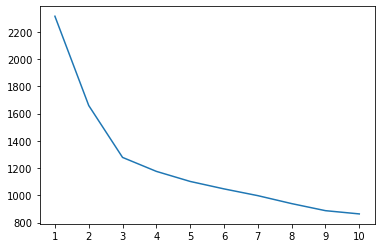

In [44]:
# do not delete this!
# calling the elbow method here
elbow_method(data_standardized,10)

In [38]:
# What is the best number of clusters according to the elbow method for Kmeans? Find the elbow!
# store the result here and use it for the rest of the assignment as input to the algorithms
# do not delete this!

number_of_clusters = 3 # change this

##  5. Run K-means, K-medoids and Agglomerative Clustering on the wine dataset


### `Task: Run K-means, K-medoids, Agglomerative with ward distance, Agglomerative with complete distance (use sklearn, scikit-learn-extra) and store the clustering labels in the variables indicated below for the respective algorithms. If you would like some help for this part you could either check the sklearn user-guide for the algorithms asked or check the examples of lab2.`


In [45]:
# run k-means (from sklearn) with the optimal number of clusters that you found above, and random_state=RSEED   
# store the cluster memberships in kmeans_labels 

# write your code here
kmeans = KMeans(n_clusters=3, random_state=RSEED)
kmeans_labels = kmeans.fit_predict(data_standardized)



In [46]:
# do not delete this!
labels_dict = {}

labels_dict["kmeans"] = kmeans_labels

In [48]:
# run k-medoids (from scikit-learn-extra) with the optimal number of clusters that you found above, and random_state=RSEED   
# store the cluster memberships in kmedoids_labels 

# write your code here
kmedoids = KMedoids(n_clusters = 3, random_state=RSEED)

kmedoids_labels = kmedoids.fit_predict(data_standardized) # change this


In [49]:
# do not delete this!

labels_dict["kmedoids"] = kmedoids_labels


In [50]:
# run Agglomerative clustering (from sklearn) with ward distance and the optimal number of clusters that you found above
# store the cluster memberships in ward_labels 

# write your code here 
ward = AgglomerativeClustering(n_clusters=3)

ward_labels = ward.fit_predict(data_standardized)

In [51]:
# do not delete this!
labels_dict["ward"] = ward_labels


In [52]:
# run Agglomerative clustering (from sklearn) with complete distance and the optimal number of clusters that you found above
# store the cluster memberships in complete_labels 

# write your code here 
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')

complete_labels  = complete.fit_predict(data_standardized)

In [53]:
# do not delete this!
labels_dict["complete"] = complete_labels

## 6. Evaluation Metrics

### `Task: Write a function that calculates the silhouette score (from sklearn) and the purity (use the function from task 2) for any given clustering.`

Specifically:

- calculate silhouette score for any given clustering with the given metric and rseed = RSEED in the function (use sklearn).
- call the purity function that you defined above and calculate purity for any given clustering.
- return the values for silhoutte score and purity in this order (s_s, pu).


In [54]:
def evaluation_metrics(X, labels_pred, labels_true,  metric, rseed = RSEED):
    """
    Input: 
        X: array-like, the dataframe used for clustering
        labels_pred: numpy array, the labels predicted by the algorithm
        labels_true: numpy array, the target/class
        metric: string, the metric to be used for silhouette score, example: 'euclidean'          

    Output:
        s_s: the value as calculated by silhouette
        pu: the value as calculated by the purity function

    # Note: if you could not implement purity in task 2, return the s_s value as calculated and pu=0
    
    """

    s_s = metrics.silhouette_score(X=X, labels=labels_pred, metric=metric, random_state=rseed)
    pu = purity(labels_true, labels_pred)

    return s_s, pu

In [55]:
# run this to check your evaluation metrics for all the clusterings that you ran in task 5.  
# do not delete this!


for keys, values in labels_dict.items():
    print("Clustering Algorithm: ", keys)
    s_s, pu = evaluation_metrics(data_standardized, values, wine.target, 'euclidean', rseed = RSEED)
    if pu == None:
        print("Silhouette Score: ", np.round(s_s, decimals=3) , "Purity: ", pu)
    else:
        print("Silhouette Score: ", np.round(s_s, decimals=3) , "Purity: ", np.round(pu, decimals=3))




Clustering Algorithm:  kmeans
Silhouette Score:  0.285 Purity:  0.966
Clustering Algorithm:  kmedoids
Silhouette Score:  0.266 Purity:  0.904
Clustering Algorithm:  ward
Silhouette Score:  0.277 Purity:  0.927
Clustering Algorithm:  complete
Silhouette Score:  0.204 Purity:  0.837


## 7. Plotting

### `Task: Reduce the dimensionality of the dataset to 2 principal components. Create 1 figure with 5 plots where you will plot the 2 principal components with colors respective to the class (plot/column 1) and the clustering labels of the four algorithms (k-means, k-medoids, aggromerative with two different distances) that you ran in task 5 (plot/columns 2-5). `

In [58]:
"""
step 1: Reduce the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component analysis.  store the reduced dataset in **pca_2d**
step 2: Create a sublot object with 1 row and 5 columns
step 3: Plot the two principal components (use a scatterplot) with colors respective to the true labels
step 4-7: Plot the two principal components (use a scatterplot) with colors respective to the clustering labels of the algorithms that we ran above
you can check Lab2-Unsuperised learning for a similar example
don't forget to put the titles on the respective plots!
"""

pca_2d = np.zeros((10,10)) #change this

# write your code here

## 8. K-medians 

### `Task: In the function called Kmedians implement Kmedians.`

Detailed instructions can be found inside the method. 

**K-medians:** Instead of taking the mean value of the object in a cluster as a reference point, medians are used (**L1-norm** as the distance measure)


The K-medians clustering algorithm:


-Select K points as the initial representative objects (choose the initial random points from the dataset samples)

-Repeat

* Assign every point to its nearest **median**

* Re-compute the median of each individual feature
    
Until convergence is satisfied   


In [59]:
def Kmedians(X, n_clusters, rseed=RSEED):
    """
    Input:
        X: numpy array, the dataset to be clustered, 
        n_clusters: the number of clusters you want your algorithm to run with, 
        RSEED: the random seed
    Output:
        centers: numpy array, the cluster centers of the algorithm you are currently running, 
        labels: numpy array, the clustering labels

    step 1: Generate a random number using np.random.RandomState and with the random seed provided in parameters
    step 2: Get the n_clusters first elements from a randomly permulated sequence with the length equal to the number of rows in X using the random number from step 1
    step 3: Retrieve from X the elements with the indices found above and make those as our first random centers
    step 4: assign each point to the nearest centers using the L1-norm as the distance measure (manhattan) and store it in a variable called labels 
    step 5: Update the centroids of each cluster using the median and store in a variable called new_centers
    step 6: while the new_centers (from step 5) are not equal to the previously created centers, repeat the process in step 4 and 5.
    
    """

    # write your code here 
    
    
    return np.zeros((4)), np.zeros(10) # change this zero np arrays to the proper outputs


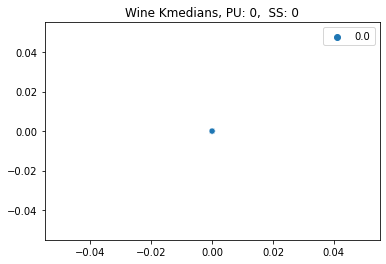

In [60]:
# do not delete this!

centers, labels = Kmedians(data_standardized.values, number_of_clusters)

s_s, pu = evaluation_metrics(data_standardized.values, labels, wine.target, 'euclidean', rseed = RSEED)


sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1], hue=labels)
if pu == None:
    plt.title("Wine Kmedians, PU: {},  SS: {}".format(pu, np.round(s_s, decimals=3)))  
else:
    plt.title("Wine Kmedians, PU: {},  SS: {}".format(np.round(pu, decimals=3), np.round(s_s, decimals=3)))

## `NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code. Some of the cells have already some variables that are filled with None values or empty dataframes, you should change those nan/empty values (we refer to it as 'change this') to what is asked in the tasks (we only stored the empty values so the whole notebook can run error free). You should not delete any of the given cells as they will help us grade the assignment. Some cells ask you to uncomment some comments, please only do so if you have solved the respective task. When you are finished with implementing all the tasks, clear all outputs,  **restart the kernel**, run all cells again (make sure there is no error) and submit! Make sure that the results and figures asked are visible for us to grade. ` 


# END OF ASSIGNMENT 2